In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from numpy.polynomial.polynomial import Polynomial

def fit_line(x, y1, y2, label1, label2):
    # Fit linear model for losses
    coefs1 = Polynomial.fit(x, y1, 1).convert().coef
    # Fit linear model for accs
    coefs2 = Polynomial.fit(x, y2, 1).convert().coef

    print(f"Linear fit for {label1}: y = {coefs1[1]:.4f} * x + {coefs1[0]:.4f}")
    print(f"Linear fit for {label2}: y = {coefs2[1]:.4f} * x + {coefs2[0]:.4f}")

config = json.load(open("config.json"))
N_CLASSES = config.get("N_CLASSES", 2)
N_POISONED_FLIENTS = config.get("N_POISONED_CLIENTS", 0)


Batch size 1:
Linear fit for Loss: y = 4.1417 * x + -0.0119
Linear fit for Accuracy: y = -0.9914 * x + 0.7410
Batch size 2:
Linear fit for Loss: y = 2.8670 * x + 0.0935
Linear fit for Accuracy: y = -1.0615 * x + 0.8080
Batch size 4:
Linear fit for Loss: y = 2.0015 * x + 0.0713
Linear fit for Accuracy: y = -1.1970 * x + 0.9753
Batch size 8:
Linear fit for Loss: y = 1.4547 * x + 0.0350
Linear fit for Accuracy: y = -1.2031 * x + 1.1240
Batch size 16:
Linear fit for Loss: y = 1.1067 * x + 0.0268
Linear fit for Accuracy: y = -1.0462 * x + 1.1835
Batch size 32:
Linear fit for Loss: y = 0.9152 * x + 0.0333
Linear fit for Accuracy: y = -0.8583 * x + 1.1904


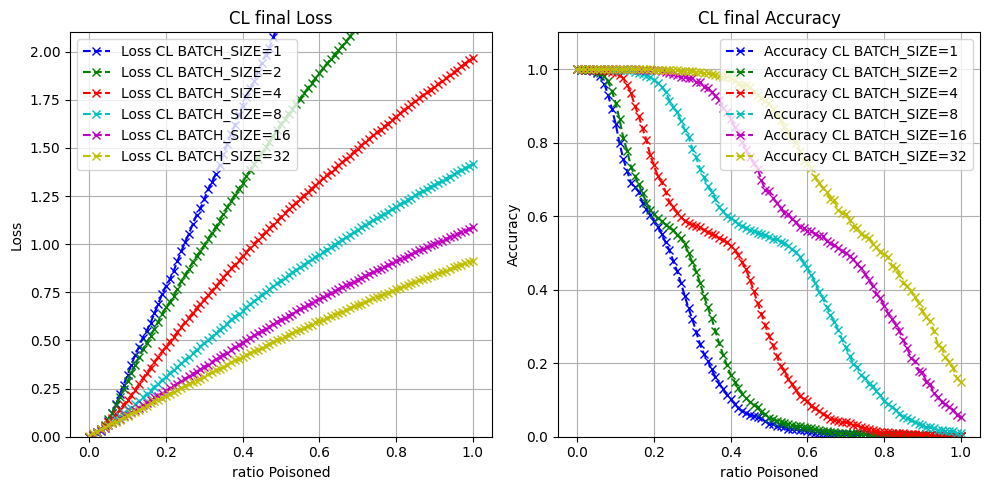

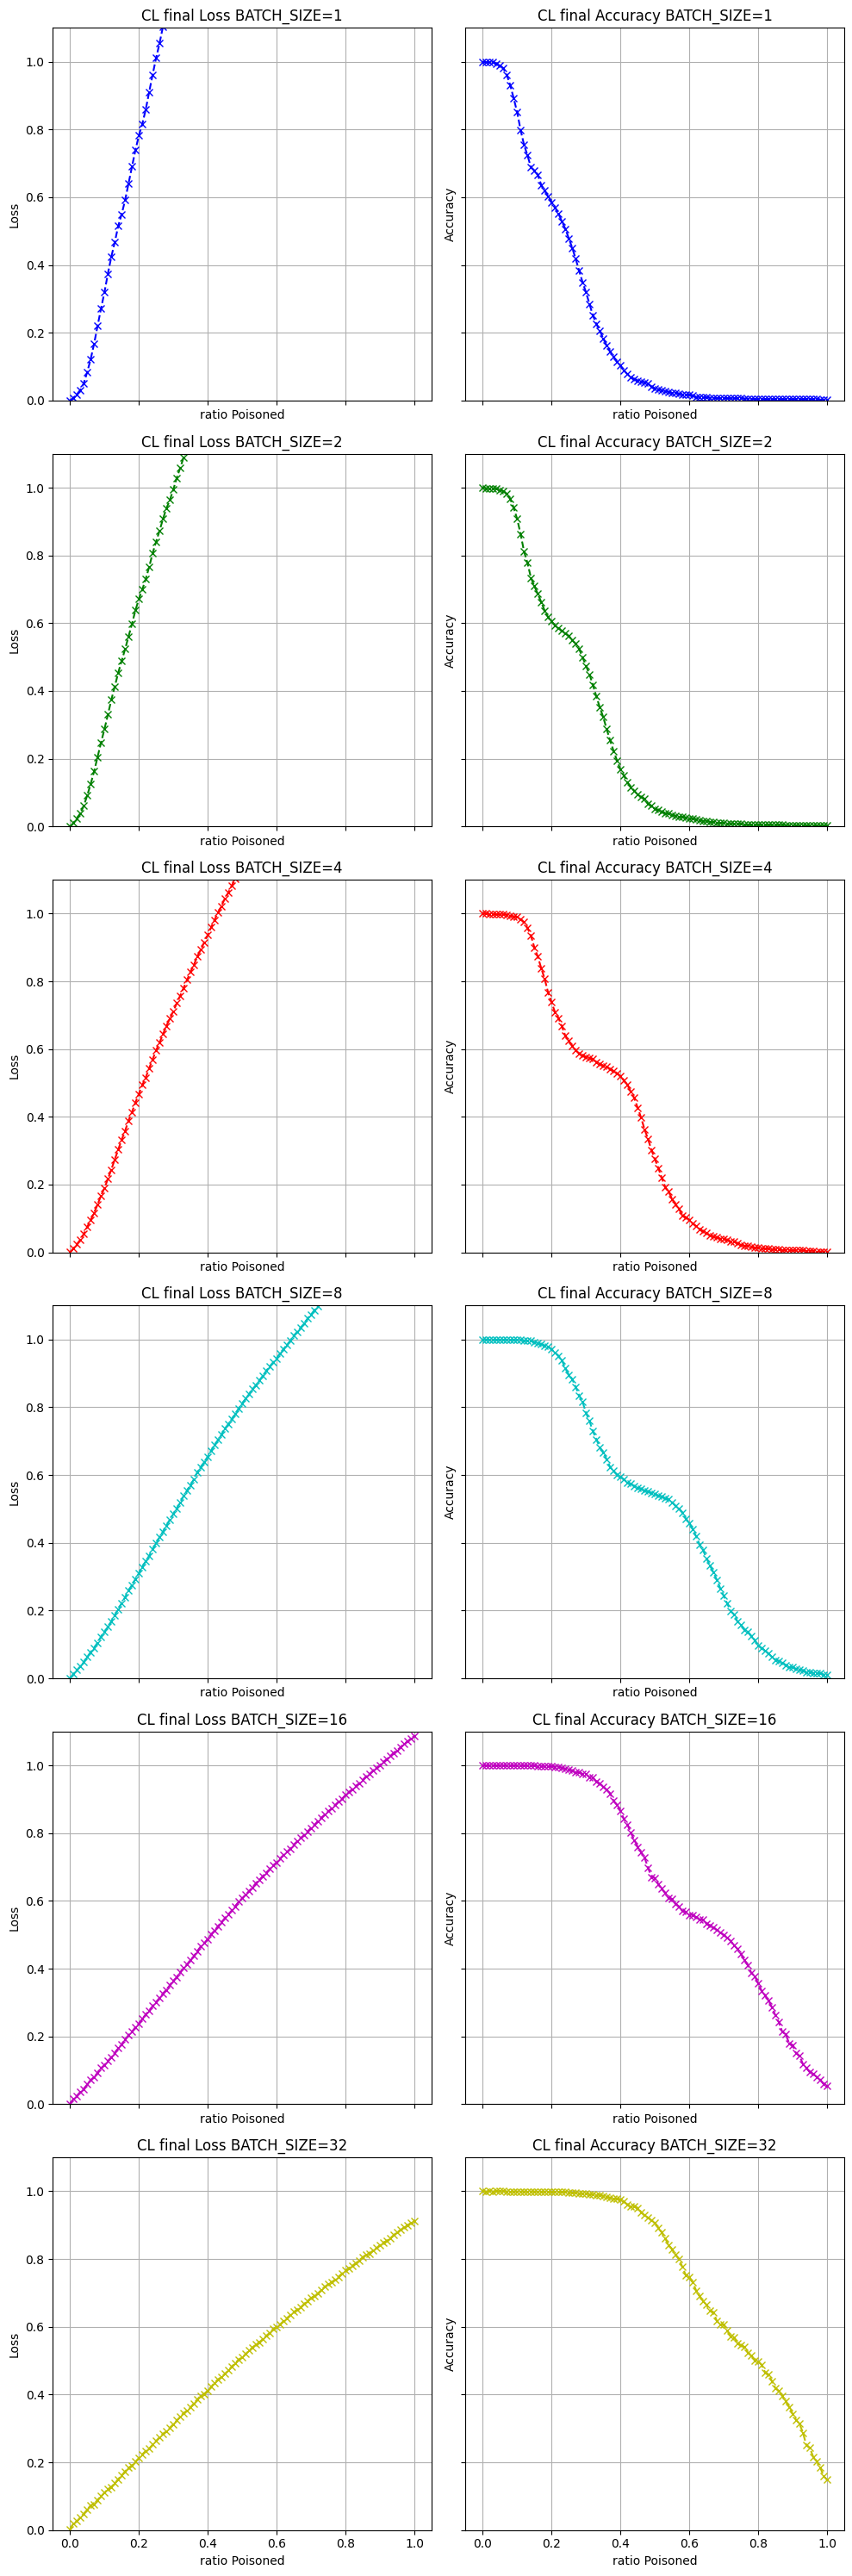

In [8]:
df_list = []
line_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for batch_i in [1,2,4,8,16,32]:
    for i in range(101):
        try:
            csv_path = fr'C:\Users\522399\Desktop\PhD\result\CL_BATCH_SIZE{batch_i}\mnist_binary_rev2\poisoned_{i}\poisoned_{i}.csv'
            df = pd.read_csv(csv_path)
            df['poisoned'] = i
            df['batch_size'] = batch_i
            df = df[['batch_size','poisoned', 'loss', 'accuracy']]
            df_list.append(df.iloc[-1:, :])
        except Exception as e:
            df_list.append(pd.DataFrame({
                'batch_size': [batch_i],
                'poisoned': [i],
                'loss': [np.nan],
                'accuracy': [np.nan]
            }))
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv(fr'C:\Users\522399\Desktop\PhD\result/CL_mnist_binary.csv', index=False)
# print(df_all)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
fig2, axs = plt.subplots(6, 2, figsize=(10, 30), sharex=True, sharey=True)

# All records up to current
fit_df = df_all.replace([np.inf, -np.inf], np.nan).dropna(subset=['loss', 'accuracy'])
# print(fit_df)
for idx,batch_i in enumerate([1,2,4,8,16,32]):
    fit_df_batch = fit_df[fit_df['batch_size'] == batch_i]
    poisoned = fit_df_batch['poisoned'].to_numpy()/100
    losses = fit_df_batch['loss'].to_numpy()
    accs = fit_df_batch['accuracy'].to_numpy()
    print(f"Batch size {batch_i}:")
    fit_line(poisoned, losses, accs, 'Loss', 'Accuracy')

    ax1.plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--', label='Loss CL BATCH_SIZE='+str(batch_i))
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('ratio Poisoned')
    ax1.set_title('CL final Loss')
    ax1.grid(True)
    ax1.set_ylim(0, 2.1)
    ax1.legend()

    ax2.plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--', label='Accuracy CL BATCH_SIZE='+str(batch_i))
    ax2.set_xlabel('ratio Poisoned')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('CL final Accuracy')
    ax2.grid(True)
    ax2.set_ylim(0, 1.1)
    ax2.legend()

    # Individual subplots
    axs[idx, 0].plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--')
    axs[idx, 0].set_ylabel('Loss')
    axs[idx, 0].set_xlabel('ratio Poisoned')
    axs[idx, 0].set_title(f'CL final Loss BATCH_SIZE={batch_i}')
    axs[idx, 0].grid(True)
    axs[idx, 0].set_ylim(0, 2.1)

    axs[idx, 1].plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--')
    axs[idx, 1].set_xlabel('ratio Poisoned')
    axs[idx, 1].set_ylabel('Accuracy')          
    axs[idx, 1].set_title(f'CL final Accuracy BATCH_SIZE={batch_i}')
    axs[idx, 1].grid(True)
    axs[idx, 1].set_ylim(0, 1.1)

save_name_path2 = fr'C:\Users\522399\Desktop\PhD\result/CL_mnist_binary_subplots.jpg'
fig2.tight_layout()
fig2.savefig(save_name_path2)

fig.tight_layout()
save_name_path = fr'C:\Users\522399\Desktop\PhD\result/CL_mnist_binary.jpg'
fig.savefig(save_name_path)

Batch size 1:
Linear fit for Loss: y = 0.8054 * x + -0.1370
Linear fit for Accuracy: y = -0.6171 * x + 1.1563
Batch size 2:
Linear fit for Loss: y = 1.1036 * x + 0.1337
Linear fit for Accuracy: y = -0.5824 * x + 0.8940
Batch size 4:
Linear fit for Loss: y = 0.6745 * x + 0.4964
Linear fit for Accuracy: y = -0.1000 * x + 0.5318
Batch size 8:
Linear fit for Loss: y = 0.3942 * x + 0.4679
Linear fit for Accuracy: y = -0.0669 * x + 0.5092
Batch size 16:
Linear fit for Loss: y = 0.2699 * x + 0.4605
Linear fit for Accuracy: y = -0.0863 * x + 0.5232
Batch size 32:
Linear fit for Loss: y = 0.2261 * x + 0.4800
Linear fit for Accuracy: y = -0.1904 * x + 0.6229


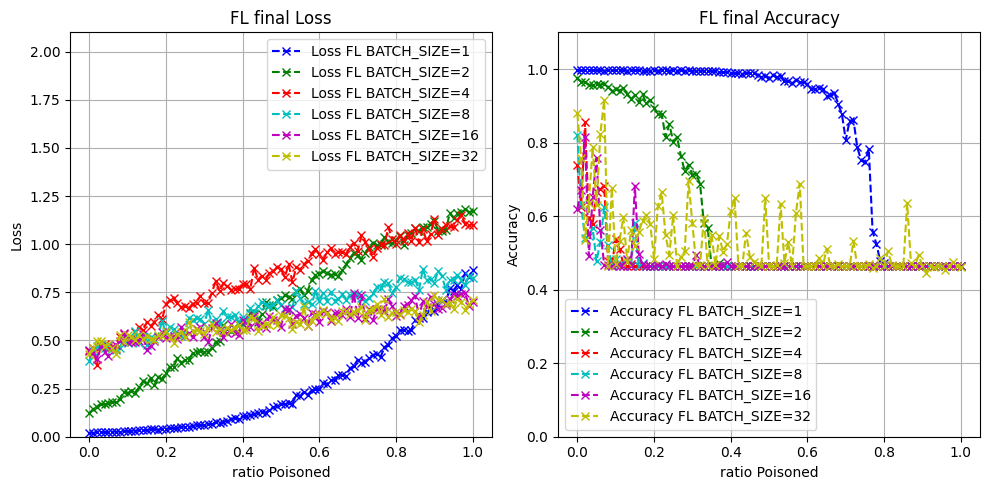

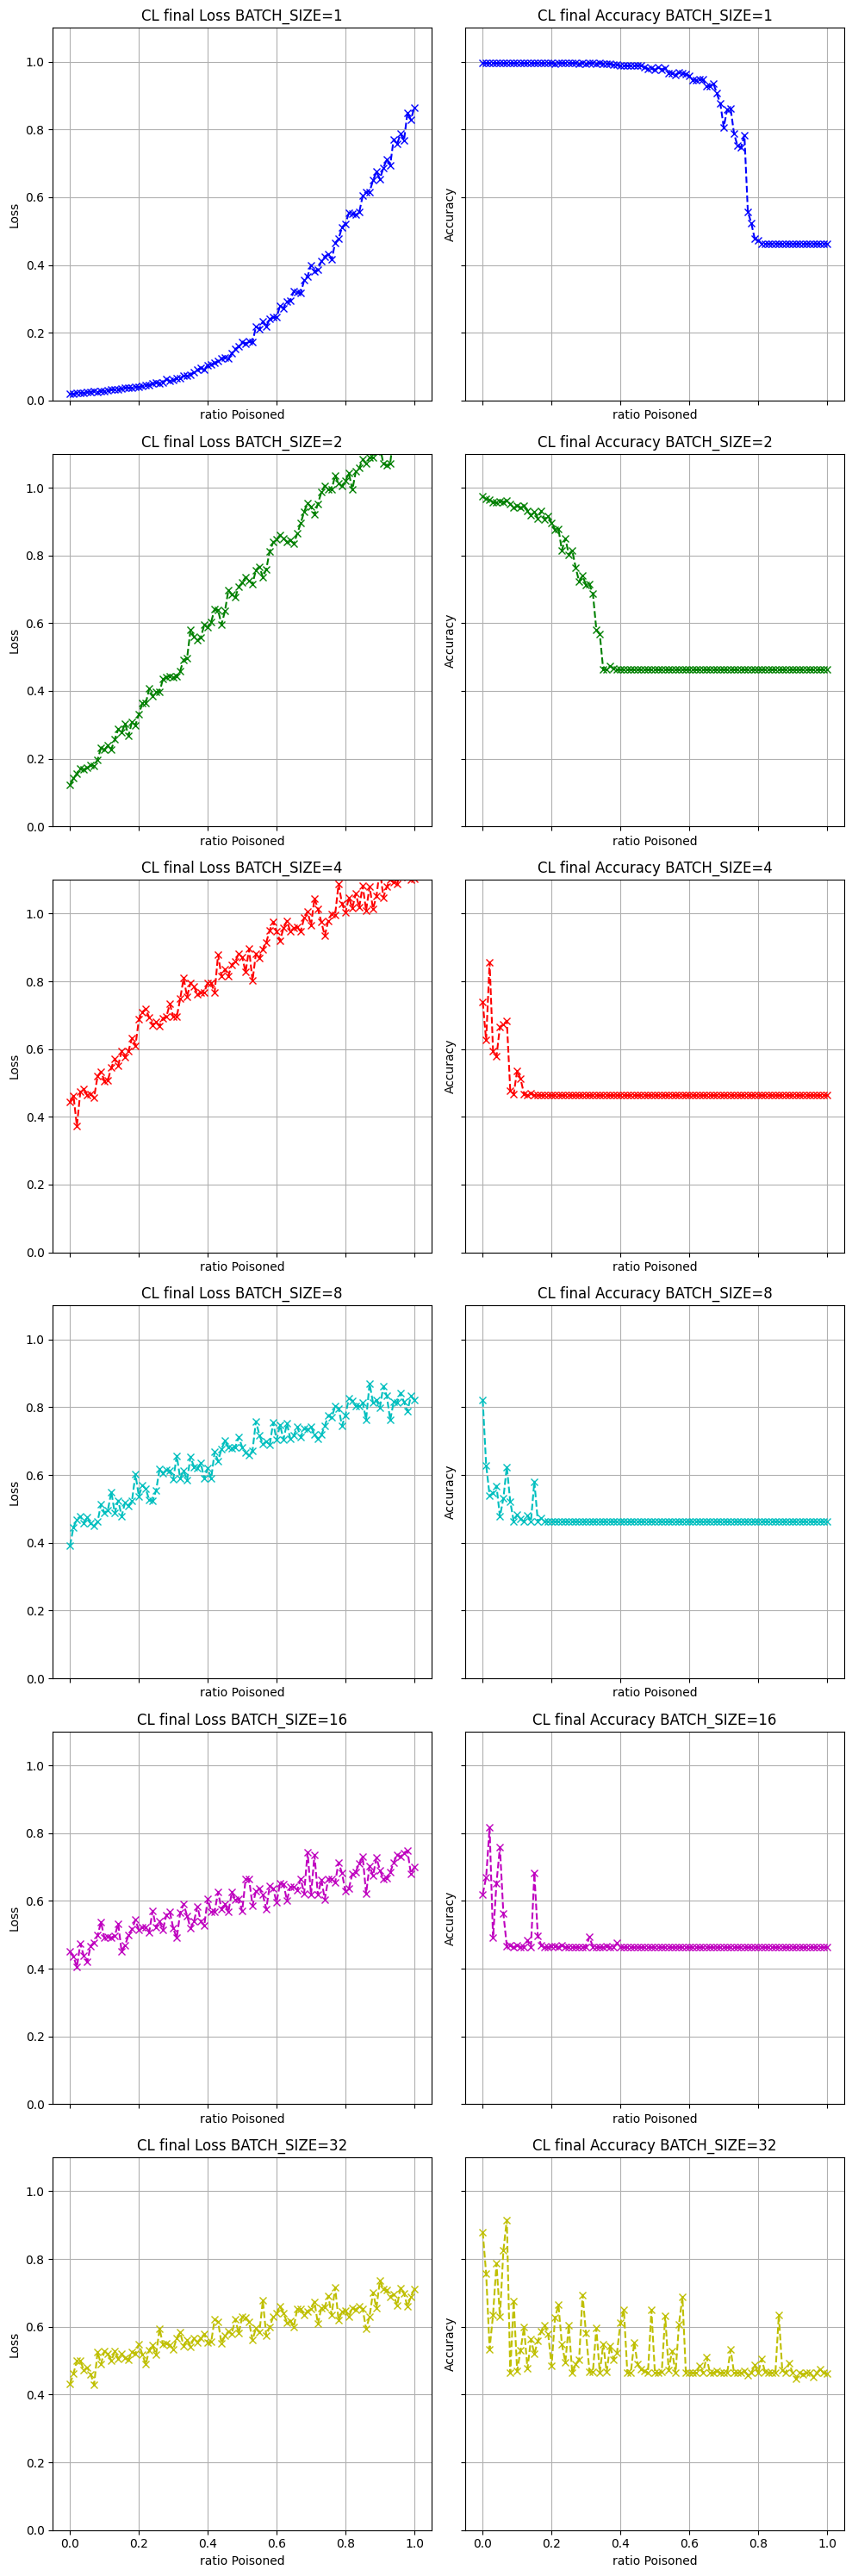

In [9]:
df_list = []
line_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for batch_i in [1,2,4,8,16,32]:
    for i in range(101):
        try:
            csv_path = fr'C:\Users\522399\Desktop\PhD\result\FL_BATCH_SIZE{batch_i}\mnist_binary_rev2\poisoned_{i}\poisoned_{i}.csv'
            df = pd.read_csv(csv_path)
            df['poisoned'] = i
            df['batch_size'] = batch_i
            df = df[['batch_size','poisoned', 'loss', 'accuracy']]
            df_list.append(df.iloc[-1:, :])
        except Exception as e:
            df_list.append(pd.DataFrame({
                'batch_size': [batch_i],
                'poisoned': [i],
                'loss': [np.nan],
                'accuracy': [np.nan]
            }))
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv(fr'C:\Users\522399\Desktop\PhD\result/FL_mnist_binary.csv', index=False)
# print(df_all)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
fig2, axs = plt.subplots(6, 2, figsize=(10, 30), sharex=True, sharey=True)

# All records up to current
fit_df = df_all.replace([np.inf, -np.inf], np.nan).dropna(subset=['loss', 'accuracy'])
# print(fit_df)
for idx,batch_i in enumerate([1,2,4,8,16,32]):
    fit_df_batch = fit_df[fit_df['batch_size'] == batch_i]
    poisoned = fit_df_batch['poisoned'].to_numpy()/100
    losses = fit_df_batch['loss'].to_numpy()
    accs = fit_df_batch['accuracy'].to_numpy()
    print(f"Batch size {batch_i}:")
    fit_line(poisoned, losses, accs, 'Loss', 'Accuracy')

    ax1.plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--', label='Loss FL BATCH_SIZE='+str(batch_i))
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('ratio Poisoned')
    ax1.set_title('FL final Loss')
    ax1.grid(True)
    ax1.set_ylim(0, 2.1)
    ax1.legend()

    ax2.plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--', label='Accuracy FL BATCH_SIZE='+str(batch_i))
    ax2.set_xlabel('ratio Poisoned')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('FL final Accuracy')
    ax2.grid(True)
    ax2.set_ylim(0, 1.1)
    ax2.legend()

    # Individual subplots
    axs[idx, 0].plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--')
    axs[idx, 0].set_ylabel('Loss')
    axs[idx, 0].set_xlabel('ratio Poisoned')
    axs[idx, 0].set_title(f'CL final Loss BATCH_SIZE={batch_i}')
    axs[idx, 0].grid(True)
    axs[idx, 0].set_ylim(0, 2.1)

    axs[idx, 1].plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--')
    axs[idx, 1].set_xlabel('ratio Poisoned')
    axs[idx, 1].set_ylabel('Accuracy')          
    axs[idx, 1].set_title(f'CL final Accuracy BATCH_SIZE={batch_i}')
    axs[idx, 1].grid(True)
    axs[idx, 1].set_ylim(0, 1.1)

save_name_path2 = fr'C:\Users\522399\Desktop\PhD\result/FL_mnist_binary_subplots.jpg'
fig2.tight_layout()
fig2.savefig(save_name_path2)

fig.tight_layout()
save_name_path = fr'C:\Users\522399\Desktop\PhD\result/FL_mnist_binary.jpg'
fig.savefig(save_name_path)

Batch size 1:
Linear fit for Loss: y = 4.3064 * x + 0.6468
Linear fit for Accuracy: y = -0.4186 * x + 0.6688
Batch size 2:
Linear fit for Loss: y = 2.2625 * x + 0.4652
Linear fit for Accuracy: y = -0.3521 * x + 0.7030
Batch size 4:
Linear fit for Loss: y = 1.9156 * x + 0.2790
Linear fit for Accuracy: y = -0.4411 * x + 0.7898
Batch size 8:
Linear fit for Loss: y = 1.1837 * x + 0.0840
Linear fit for Accuracy: y = -0.8380 * x + 1.0388
Batch size 16:
Linear fit for Loss: y = 0.7416 * x + 0.1203
Linear fit for Accuracy: y = -0.7125 * x + 1.1371
Batch size 32:
Linear fit for Loss: y = 0.6705 * x + 0.1227
Linear fit for Accuracy: y = -0.5446 * x + 1.1340


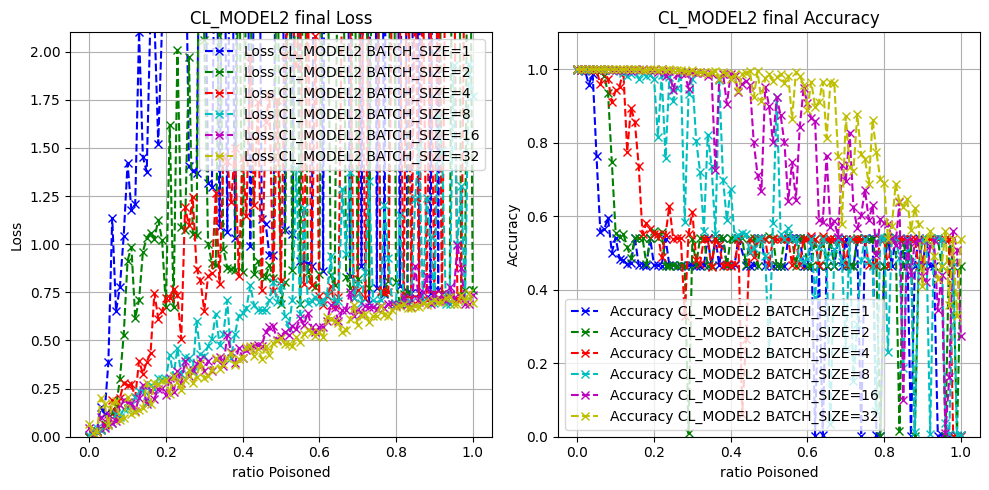

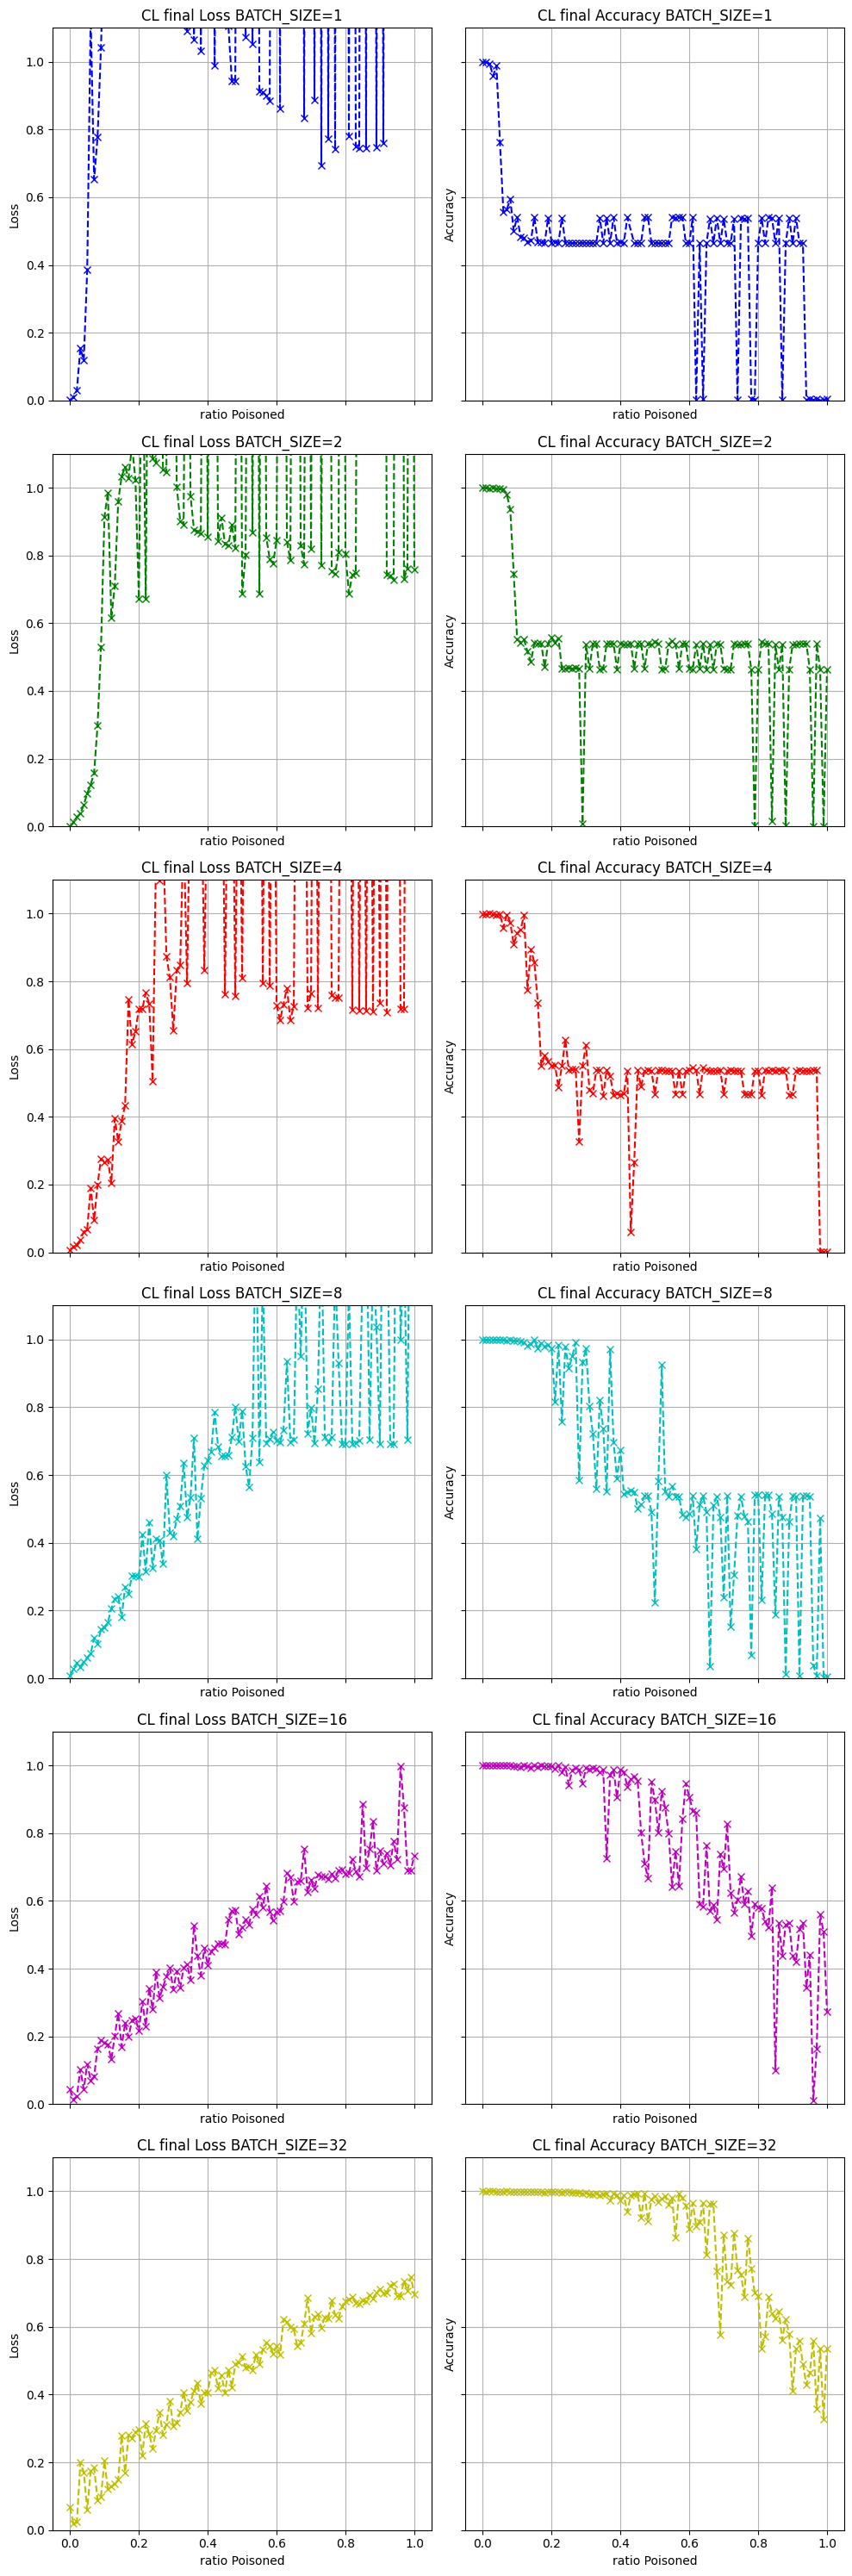

In [13]:
df_list = []
line_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for batch_i in [1,2,4,8,16,32]:
    for i in range(101):
        try:
            csv_path = fr'C:\Users\522399\Desktop\PhD\result\CL_MODEL2_BATCH_SIZE{batch_i}\mnist_binary_rev2\poisoned_{i}\poisoned_{i}.csv'
            df = pd.read_csv(csv_path)
            df['poisoned'] = i
            df['batch_size'] = batch_i
            df = df[['batch_size','poisoned', 'loss', 'accuracy']]
            df_list.append(df.iloc[-1:, :])
        except Exception as e:
            df_list.append(pd.DataFrame({
                'batch_size': [batch_i],
                'poisoned': [i],
                'loss': [np.nan],
                'accuracy': [np.nan]
            }))
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv(fr'C:\Users\522399\Desktop\PhD\result/CL_MODEL2_mnist_binary.csv', index=False)
# print(df_all)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
fig2, axs = plt.subplots(6, 2, figsize=(10, 30), sharex=True, sharey=True)

# All records up to current
fit_df = df_all.replace([np.inf, -np.inf], np.nan).dropna(subset=['loss', 'accuracy'])
# print(fit_df)
for idx,batch_i in enumerate([1,2,4,8,16,32]):
    fit_df_batch = fit_df[fit_df['batch_size'] == batch_i]
    poisoned = fit_df_batch['poisoned'].to_numpy()/100
    losses = fit_df_batch['loss'].to_numpy()
    accs = fit_df_batch['accuracy'].to_numpy()
    print(f"Batch size {batch_i}:")
    fit_line(poisoned, losses, accs, 'Loss', 'Accuracy')

    ax1.plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--', label='Loss CL_MODEL2 BATCH_SIZE='+str(batch_i))
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('ratio Poisoned')
    ax1.set_title('CL_MODEL2 final Loss')
    ax1.grid(True)
    ax1.set_ylim(0, 2.1)
    ax1.legend()

    ax2.plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--', label='Accuracy CL_MODEL2 BATCH_SIZE='+str(batch_i))
    ax2.set_xlabel('ratio Poisoned')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('CL_MODEL2 final Accuracy')
    ax2.grid(True)
    ax2.set_ylim(0, 1.1)
    ax2.legend()

    # Individual subplots
    axs[idx, 0].plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--')
    axs[idx, 0].set_ylabel('Loss')
    axs[idx, 0].set_xlabel('ratio Poisoned')
    axs[idx, 0].set_title(f'CL final Loss BATCH_SIZE={batch_i}')
    axs[idx, 0].grid(True)
    axs[idx, 0].set_ylim(0, 2.1)

    axs[idx, 1].plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--')
    axs[idx, 1].set_xlabel('ratio Poisoned')
    axs[idx, 1].set_ylabel('Accuracy')          
    axs[idx, 1].set_title(f'CL final Accuracy BATCH_SIZE={batch_i}')
    axs[idx, 1].grid(True)
    axs[idx, 1].set_ylim(0, 1.1)

save_name_path2 = fr'C:\Users\522399\Desktop\PhD\result/CL_MODEL2_mnist_binary_subplots.jpg'
fig2.tight_layout()
fig2.savefig(save_name_path2)

fig.tight_layout()
save_name_path = fr'C:\Users\522399\Desktop\PhD\result/CL_MODEL2_mnist_binary.jpg'
fig.savefig(save_name_path)

Batch size 1:
Linear fit for Loss: y = 0.6480 * x + 0.0926
Linear fit for Accuracy: y = -0.5681 * x + 1.0374
Batch size 2:
Linear fit for Loss: y = 0.7239 * x + 0.2503
Linear fit for Accuracy: y = -0.5110 * x + 0.8795
Batch size 4:
Linear fit for Loss: y = 0.5089 * x + 0.4474
Linear fit for Accuracy: y = -0.3283 * x + 0.7213
Batch size 8:
Linear fit for Loss: y = 0.2235 * x + 0.5310
Linear fit for Accuracy: y = -0.2297 * x + 0.6677
Batch size 16:
Linear fit for Loss: y = 0.1722 * x + 0.5541
Linear fit for Accuracy: y = -0.1258 * x + 0.5992
Batch size 32:
Linear fit for Loss: y = 0.1510 * x + 0.5778
Linear fit for Accuracy: y = -0.2188 * x + 0.6974


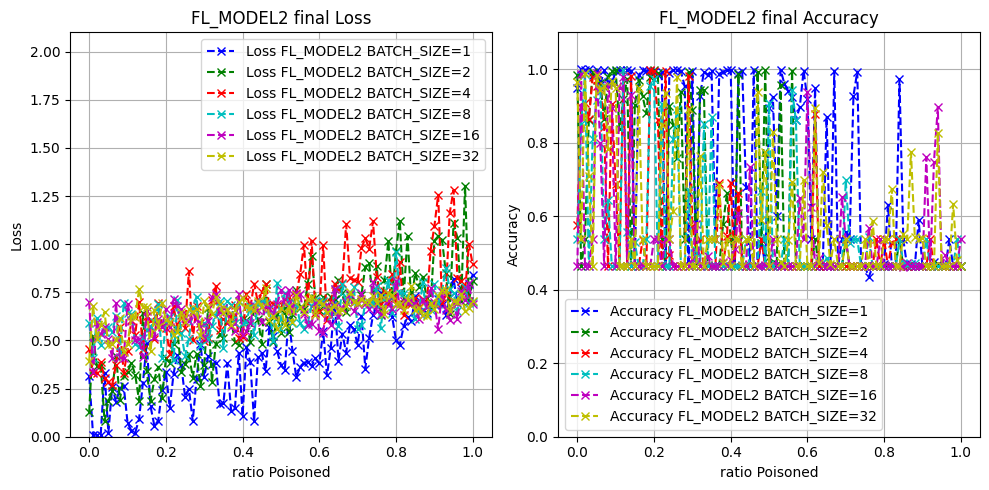

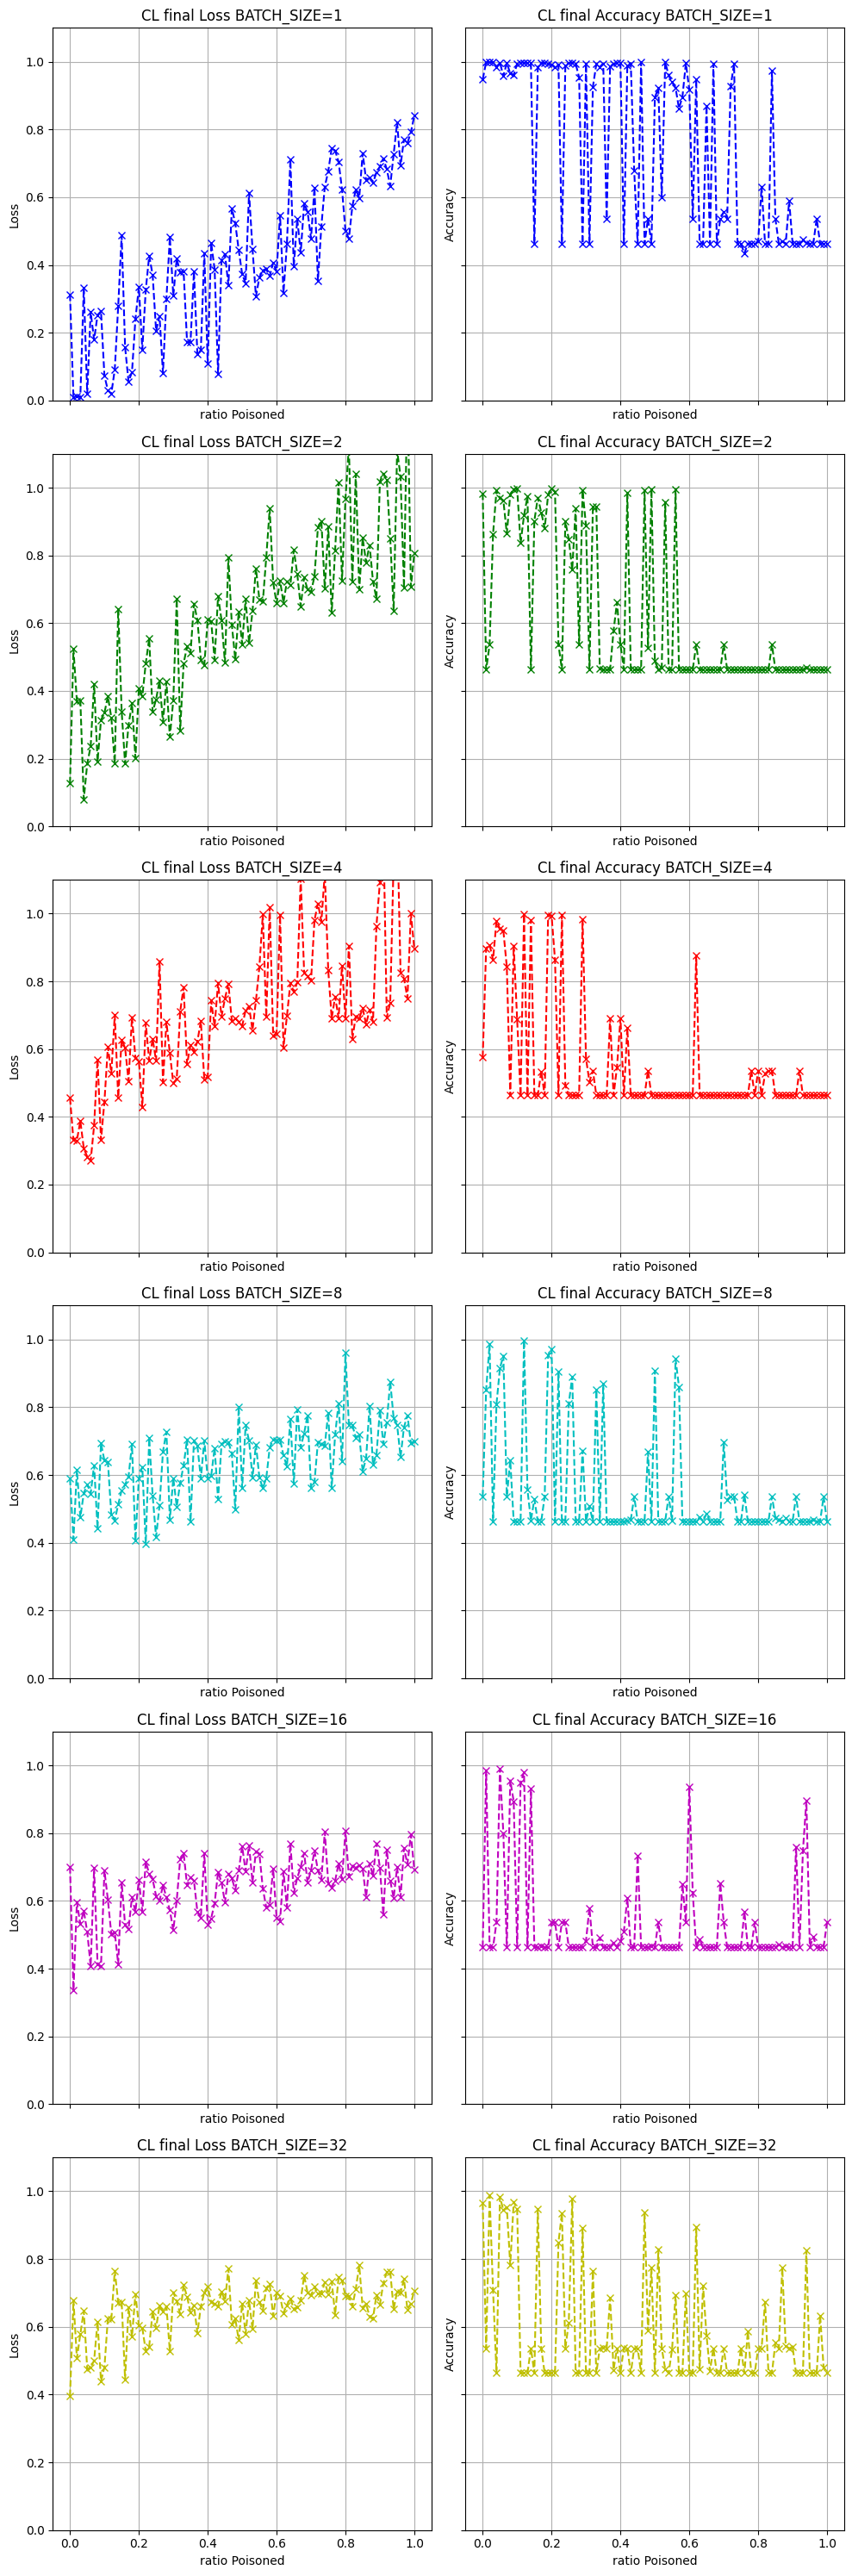

In [11]:
df_list = []
line_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for batch_i in [1,2,4,8,16,32]:
    for i in range(101):
        try:
            csv_path = fr'C:\Users\522399\Desktop\PhD\result\FL_MODEL2_BATCH_SIZE{batch_i}\mnist_binary_rev2\poisoned_{i}\poisoned_{i}.csv'
            df = pd.read_csv(csv_path)
            df['poisoned'] = i
            df['batch_size'] = batch_i
            df = df[['batch_size','poisoned', 'loss', 'accuracy']]
            df_list.append(df.iloc[-1:, :])
        except Exception as e:
            df_list.append(pd.DataFrame({
                'batch_size': [batch_i],
                'poisoned': [i],
                'loss': [np.nan],
                'accuracy': [np.nan]
            }))
df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv(fr'C:\Users\522399\Desktop\PhD\result/FL_MODEL2_mnist_binary.csv', index=False)
# print(df_all)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
fig2, axs = plt.subplots(6, 2, figsize=(10, 30), sharex=True, sharey=True)

# All records up to current
fit_df = df_all.replace([np.inf, -np.inf], np.nan).dropna(subset=['loss', 'accuracy'])
# print(fit_df)
for idx,batch_i in enumerate([1,2,4,8,16,32]):
    fit_df_batch = fit_df[fit_df['batch_size'] == batch_i]
    poisoned = fit_df_batch['poisoned'].to_numpy()/100
    losses = fit_df_batch['loss'].to_numpy()
    accs = fit_df_batch['accuracy'].to_numpy()
    print(f"Batch size {batch_i}:")
    fit_line(poisoned, losses, accs, 'Loss', 'Accuracy')

    ax1.plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--', label='Loss FL_MODEL2 BATCH_SIZE='+str(batch_i))
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('ratio Poisoned')
    ax1.set_title('FL_MODEL2 final Loss')
    ax1.grid(True)
    ax1.set_ylim(0, 2.1)
    ax1.legend()

    ax2.plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--', label='Accuracy FL_MODEL2 BATCH_SIZE='+str(batch_i))
    ax2.set_xlabel('ratio Poisoned')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('FL_MODEL2 final Accuracy')
    ax2.grid(True)
    ax2.set_ylim(0, 1.1)
    ax2.legend()

    # Individual subplots
    axs[idx, 0].plot(poisoned, losses, marker='x', color=line_colors[idx], linestyle='--')
    axs[idx, 0].set_ylabel('Loss')
    axs[idx, 0].set_xlabel('ratio Poisoned')
    axs[idx, 0].set_title(f'CL final Loss BATCH_SIZE={batch_i}')
    axs[idx, 0].grid(True)
    axs[idx, 0].set_ylim(0, 2.1)

    axs[idx, 1].plot(poisoned, accs, marker='x', color=line_colors[idx], linestyle='--')
    axs[idx, 1].set_xlabel('ratio Poisoned')
    axs[idx, 1].set_ylabel('Accuracy')          
    axs[idx, 1].set_title(f'CL final Accuracy BATCH_SIZE={batch_i}')
    axs[idx, 1].grid(True)
    axs[idx, 1].set_ylim(0, 1.1)

save_name_path2 = fr'C:\Users\522399\Desktop\PhD\result/FL_MODEL2_mnist_binary_subplots.jpg'
fig2.tight_layout()
fig2.savefig(save_name_path2)

fig.tight_layout()
save_name_path = fr'C:\Users\522399\Desktop\PhD\result/FL_MODEL2_mnist_binary.jpg'
fig.savefig(save_name_path)